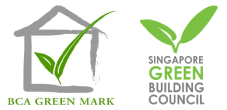

# Energy Consumption in Greenmark Buildings

The Green Mark standard is an assesssment of environmental performance of a building for thermal, lighting, indoor air quality and energy efficiency. Green Mark points are awarded for incorprating sustainable green features and practices. 

There are two main groupings of assessment criteria:

a. Energy Efficiency (where a minimum of 30 points must be obtained)
   
b. Other Green requirements (where a minium of 20 points must be obtained)
1. Water Efficiency
2. Sustainable operation & management
3. Indoor environmental quality
4. Other green features.

In this dataset of annual energy consumption form Singapore buildings, there are data for energy use intensity (EUI) in year 2017 and 2018 for different types of building and the respective Green Mark Rating. EUI is measured by the total electricity used within a building in a year per gross floor area. There are total of 5 rating types in this dataset - Platinum, GoldPLus, Gold, Certified and Uncertified where Platinum is the highest scoring Green Mark rate. 

The objective of this project is to review if Green Mark awarded buildings have a lower EUI as compared to uncertified buildings. 

# Import library and cleaning data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
raw_data = pd.read_csv('../input/annual-energy-consumption-from-singapore-buildings/listing-of-building-energy-performance-data-for-commercial-buildings.csv')
raw_data.info()

The study will focus on comparing Greenmark status, rating and award with the energy use intensity. Building size and gross floor area will be used as secondary data. The other remaining data will be dropped as they will not be in use. 

In [ ]:
raw_data = raw_data.drop(['buildingname','buildingaddress','voluntarydisclosure'],axis=1)

In [ ]:
raw_data.info()

Rename column as below:

* buildingtype to Type
* greenmarkstatus to Status
* greenmarkrating to Rating
* greenmarkyearaward to Year
* buildingsize to Size
* grossfloorarea to GFA
* 2017energyuseintensity to 2017 EUI
* 2018energyusintensity to 2018 EUI

In [ ]:
raw_data = raw_data.rename(columns={'buildingtype':'Type','greenmarkstatus':'Status','greenmarkrating':'Rating','greenmarkyearaward':'Year','buildingsize':'Size','grossfloorarea':'GFA','2017energyuseintensity':'2017 EUI','2018energyusintensity':'2018 EUI'})
raw_data.info()

There are total of 1244 entries. There seems to be a high null count for greenmark rating and year award. We will check the reason for the high null count. 

In [ ]:
raw_data[['Status','Rating','Year']]

It seems that building that does not have greenmark status will have the rating and year award as null. Hence, we will not clear the null values for these columns. 

In [ ]:
raw_data.isnull().sum()

We will drop rows that have null values for building size, gross floor area, 2017 and 2018 EUI. 

In [ ]:
raw_data = raw_data.dropna(subset = ['Size','GFA','2017 EUI','2018 EUI'])
raw_data.info()
raw_data

Gross floor area is suppose to be float instead of object. We will change the gross floor area type.

In [ ]:
raw_data['GFA'] = raw_data['GFA'].str.replace(',','').astype(float)
raw_data.info()
raw_data

# Analysis

We will now see how many building types are there in this data based and determine which type of building we would like to further analyse the data. 

In [ ]:
raw_data[['Type']].value_counts()

The dataset consist of mostly office, hotel and retail building type.

In [ ]:
raw_data[['Rating']].value_counts()

Above are the green mark rating that are in this data set. 

# Office Building

As there are 450 entries for office building, we will perform our analysis for this building type. We will first select the data for office building only. 

In [ ]:
ob = raw_data[raw_data['Type'].isin(['Office'])]
ob.info()
ob.head()

Next, we will see what are the rating distribution for office building.

In [ ]:
ob[['Rating']].value_counts()

Drop 'Legislated' rating as there is only 1 entry.

In [ ]:
ob = ob[ob.Rating != 'Legislated']
ob[['Rating']].value_counts()

Change green mark rating to value for plotting.
* Platinum = 4
* GoldPlus = 3
* Gold = 2
* Certified = 1
* Not certified = 0

In [ ]:
def f(row):
    if (row['Rating'] == 'Platinum'):
        val = 4
    elif (row['Rating'] == 'GoldPlus'):
        val = 3
    elif (row['Rating'] == 'Gold'):
        val = 2
    elif (row['Rating'] == 'Certified'):
        val = 1
    else:
        val = 0
    return val

ob['Rating'] = ob.apply(f,axis=1)
ob[['Rating']].value_counts()
ob.head()

Here we plot a scatter plot to see the distribution for each green mark rating. 

In [ ]:
obplot = ob.plot(x = 'Rating',y ='2017 EUI',kind = 'scatter',xticks = ([4,3,2,1,0]),c='r')
obplot.set_xticklabels(['Platinum','GoldPlus','Gold','Certified','Not certified'])
obplot = ob.plot(x = 'Rating',y ='2018 EUI',kind = 'scatter',xticks = ([4,3,2,1,0]),c='g')
obplot.set_xticklabels(['Platinum','GoldPlus','Gold','Certified','Not certified'])

Based on the scatter plot above, it seems that certified rating buildings has a lower energy use intensity as compared to better rating buildings. GoldPlus rating buildings have the highest EUI amongst buildings that are awarded green mark. 

The scatter plot also shows that office buildings that are not certified have a wider range of EUI as these buildings are not 'regulated' or not actively working towards a green building. This also shows green mark grading successfully help stakeholders of the buildings to work towards an energy efficient building. 

Next, we will plot a bar chart of the mean EUI for each ratings.

In [ ]:
obpl = ob[ob['Rating'].isin([4])]
obplm = obpl.mean()
obgp = ob[ob['Rating'].isin([3])]
obgpm = obgp.mean()
obgo = ob[ob['Rating'].isin([2])]
obgom = obgo.mean()
obce = ob[ob['Rating'].isin([1])]
obcem = obce.mean()
obnc = ob[ob['Rating'].isin([0])]
obncm = obnc.mean()

Create dataframe for 2017 and 2018 EUI for each green mark rating. 

In [ ]:
df = pd.DataFrame({'Platinum':obplm,'GoldPlus':obgpm,'Gold':obgom,'Certified':obcem,'Not Certified':obncm})
df = df.drop(['Rating','Year','GFA'])
df

In [ ]:
df.plot.bar()

Based on the chart above, it is shown that the mean EUI for platinum building is comparable to buildings that only have certified rating. While GoldPlus rating buildings have the highest EUI for 2018. 

The above result is unexpected as it is intuitive that we would want to see platinum buildings having the lowest EUI followed by GoldPlus, Gold etc. Currently, based on EUI alone, GoldPlus is higher than Gold, certifified and even uncertified buildings. On average, certified buildings have lower EUI compared to the rest of the higher award ratings. 

# Conclusion

The above analysis showed that the EUI for higher rating building does not perform better than lower or even uncertified buildings. The reason could be that certified buildings focus more on the energy efficiency part of the assessment which have the higher weightage in achieving of green mark certification. While, Gold and above ratings distribute their scoring efforts to other green requirements too. Only platinum rated buildings are able to maintain a lower EUI with high scores at other green requirements. 

**References**

BCA Green MArk Certification Standard for Existing Buildings
https://www.bca.gov.sg/greenmark/others/GM_Existing_Building_Certification_Standard.pdf

BCA Building Energy Benchmarking Report (Statistics and Figures) 2018
https://www.bca.gov.sg/GreenMark/others/BCA_BEBR_Abridged_FA_2018.pdf

About the Green Building Masterplan at Singapore (*Some of the data cleaning approach was noted when reviewing this article*)
https://www.kaggle.com/kevinnwu/singapore-green-building

